# Got Default?

### Goals:
- To find the drivers for loan defaults and to predict why they default.


## Imports

In [25]:
# Standard imports

import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import wrangle as w
from scipy.stats import ttest_ind
# Sklearn imports, along with XGB & XGB regressor, plot tree

from sklearn.metrics import mean_squared_error
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import xgboost as xgb
from xgboost import XGBRegressor, plot_tree
import warnings
warnings.filterwarnings('ignore')

## Aquire: 

- imported data via csv from kaggle. The csv came from coursera. An online Data Science learning website.

- CSV contained 255,347 Rows & 18 Columns
- each row represented a single individual and whether their loan defaulted or not. Along with information about the individual.
- each column represents specific information, how much income, married, credit score, intrest rate, etc.


## Prepare: 
 ### Prepare Actions
 
 ### Renamed_columns: 
 
 'LoanID','Age','Income','LoanAmount','CreditScore','MonthsEmployed','NumCreditLines', 'InterestRate','LoanTerm','DTIRatio','Education'	'EmploymentType','MaritalStatus','HasMortgage'	'HasDependents','LoanPurpose','HasCoSigner','Default'
 
 ### checked data for indescripencies:
 
- data had no nulls or missing values
- no outliers 
- encoded all yes and no values to 1's & 0's
- split data into train, validate, test

 ## Features and Definitions: 
 
 | Feature           | Definition                                            |
|-------------------|-------------------------------------------------------|
| age               | Age of the individual                                  |
| income            | Income of the individual                               |
| loan_amount       | Amount of the loan                           |
| credit_score      | Credit score of the individual                         |
| months_employed   | Number of months employed                              |
| no_credit_lines   | Number of credit lines                                 |
| interest_rate     | Interest rate on the loan                              |
| loan_term         | Term (duration) of the loan                            |
| debt_income_ratio | Debt-to-Income ratio                                   |
| education         | Educational level of the individual                    |
| employment_type   | Type of employment                                     |
| marital_status    | Marital status of the individual                       |
| mortgage          | Presence of a mortgage (Yes/No)                        |
| dependents        | Presence of dependents (Yes/No)                        |
| loan_purpose      | Purpose of the loan                                    |
| cosigner          | Presence of a co-signer (Yes/No)                       


### Here is the link to the website with the csv. There is no direct link to the csv. So when you get the website scroll down and download the csv. 

https://www.kaggle.com/datasets/nikhil1e9/loan-default

In [2]:
# creating a path to the CSV file
csv_file_path = 'loan_default.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [3]:
df.head(5)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [5]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [6]:
df = w.clean_data(df)

In [7]:
df

,age,income,loan_amount,credit_score,months_employed,no_credit_lines,interest_rate,loan_term,debt_income_ratio,education,employment_type,marital_status,mortgage,dependents,loan_purpose,cosigner,defaulted
loan_id,,,,,,,,,,,,,,,,,
I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,1,1,Other,1,0
HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,0,0,Other,1,0
C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,1,1,Auto,0,1
V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,0,0,Business,0,0
EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,0,1,Auto,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,0,0,Other,0,0
98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,0,0,Home,0,1
XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,1,1,Auto,1,0


### Checking Columns after cleaning the data to make sure nothing is wrong with the proper dtypes.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255347 entries, I38PQUQS96 to ZTH91CGL0B
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                255347 non-null  int64  
 1   income             255347 non-null  int64  
 2   loan_amount        255347 non-null  int64  
 3   credit_score       255347 non-null  int64  
 4   months_employed    255347 non-null  int64  
 5   no_credit_lines    255347 non-null  int64  
 6   interest_rate      255347 non-null  float64
 7   loan_term          255347 non-null  int64  
 8   debt_income_ratio  255347 non-null  float64
 9   education          255347 non-null  object 
 10  employment_type    255347 non-null  object 
 11  marital_status     255347 non-null  object 
 12  mortgage           255347 non-null  int64  
 13  dependents         255347 non-null  int64  
 14  loan_purpose       255347 non-null  object 
 15  cosigner           255347 non-null  int64  

### So we have 29,653 of our loans are defaulted out of 255347  loans.
- Going to add a column to bin credit score.

In [9]:
count_ones = (df['defaulted'] == 1).sum()
count_ones

29653

In [10]:
# created new column with this function splitting my credit rating into low average and high

def cred_rating(row):
    if 300 <= row['credit_score'] <=  575:
        return 'low'
    elif 576 <= row['credit_score'] <= 700:
        return 'average'
    elif 701 <= row['credit_score'] <= 850:
        return 'high'


In [11]:
df['credit_rating'] = df.apply(cred_rating, axis=1)

### Check to see if column was added 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255347 entries, I38PQUQS96 to ZTH91CGL0B
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                255347 non-null  int64  
 1   income             255347 non-null  int64  
 2   loan_amount        255347 non-null  int64  
 3   credit_score       255347 non-null  int64  
 4   months_employed    255347 non-null  int64  
 5   no_credit_lines    255347 non-null  int64  
 6   interest_rate      255347 non-null  float64
 7   loan_term          255347 non-null  int64  
 8   debt_income_ratio  255347 non-null  float64
 9   education          255347 non-null  object 
 10  employment_type    255347 non-null  object 
 11  marital_status     255347 non-null  object 
 12  mortgage           255347 non-null  int64  
 13  dependents         255347 non-null  int64  
 14  loan_purpose       255347 non-null  object 
 15  cosigner           255347 non-null  int64  

In [13]:
df.credit_rating.value_counts()

low        128383
high        68946
average     58018
Name: credit_rating, dtype: int64

### Noticed there is alot of people in the low column for credit rating.

## Going to run some vizualizations on the data 

### Divorced has a higher loan default which it is not shocking which is not too noticable 

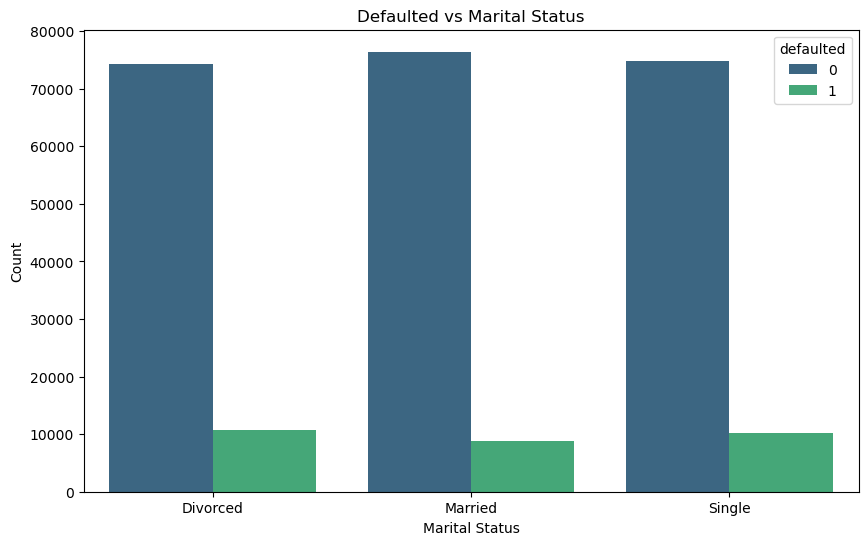

In [14]:
# Create a count plot for education and defaulted
plt.figure(figsize=(10, 6))
sns.countplot(x='marital_status', hue='defaulted', data=df, palette='viridis')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Defaulted vs Marital Status')
plt.show()

### Unemployed of course has a higher default rate due to being unemployed more than likely

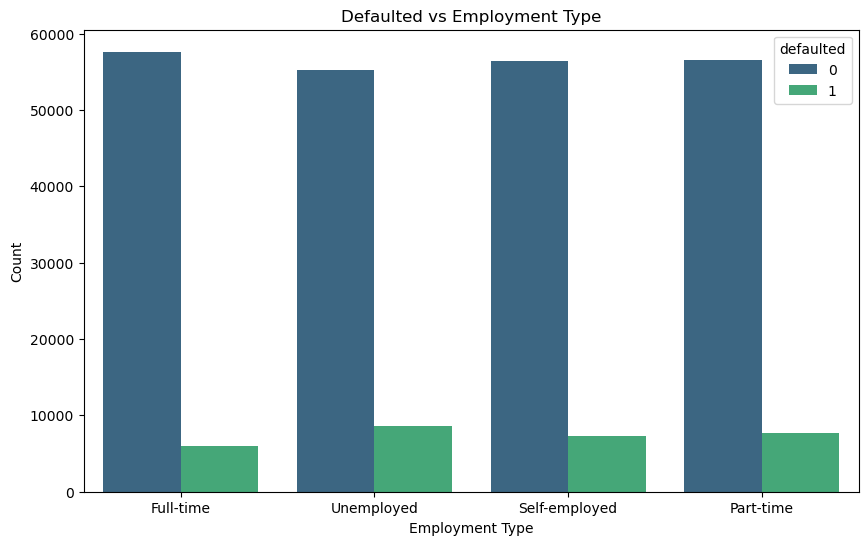

In [15]:
# Create a count plot for education and defaulted
plt.figure(figsize=(10, 6))
sns.countplot(x='employment_type', hue='defaulted', data=df, palette='viridis')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.title('Defaulted vs Employment Type')
plt.show()

### Going to go ahead and split the data and get more of an in depth look

In [16]:
train, validate, test = w.split_data(df)
train.head()

Train: 0.5999953005126357
Validate: 0.20000234974368214
Test: 0.20000234974368214


,age,income,loan_amount,credit_score,months_employed,no_credit_lines,interest_rate,loan_term,debt_income_ratio,education,employment_type,marital_status,mortgage,dependents,loan_purpose,cosigner,defaulted,credit_rating
loan_id,,,,,,,,,,,,,,,,,,
2FEE66HVO3,57,32880,38552,474,108,2,8.60,24,0.62,High School,Full-time,Divorced,0,1,Business,1,0,low
FXEAZ6F4KJ,20,57608,228885,522,2,4,13.86,12,0.65,Bachelor's,Full-time,Divorced,1,0,Other,0,0,low
KMM2TU8JGI,18,137506,216972,584,93,4,3.69,12,0.67,Bachelor's,Part-time,Single,1,0,Auto,1,0,average
YMBWR05BG6,20,66320,34880,423,38,4,19.02,60,0.27,High School,Self-employed,Married,0,0,Home,1,1,low
H2J918A441,31,39220,152376,391,105,3,5.04,60,0.75,Master's,Self-employed,Single,0,0,Education,1,0,low


### Does Interest Rates and Credit Score have an affect on defaulted loans? 

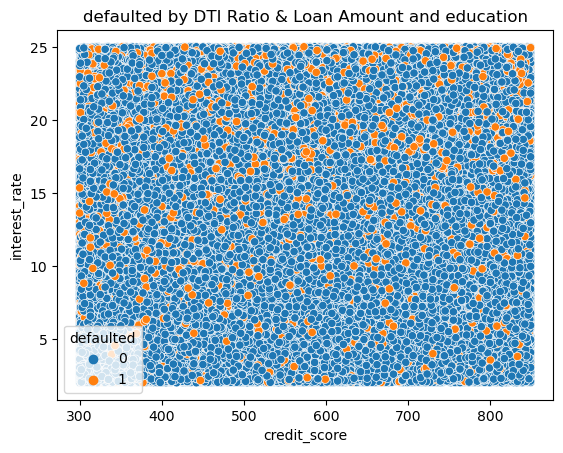

In [17]:
# Scatterplot but it is a mess and not easy to look at
sns.scatterplot(x='credit_score', y='interest_rate', data=train, hue='defaulted')

plt.title('defaulted by DTI Ratio & Loan Amount and education')
plt.show()


###  This shows that loans are around 89 percent are not defaulted and over 10 percent are defaulted

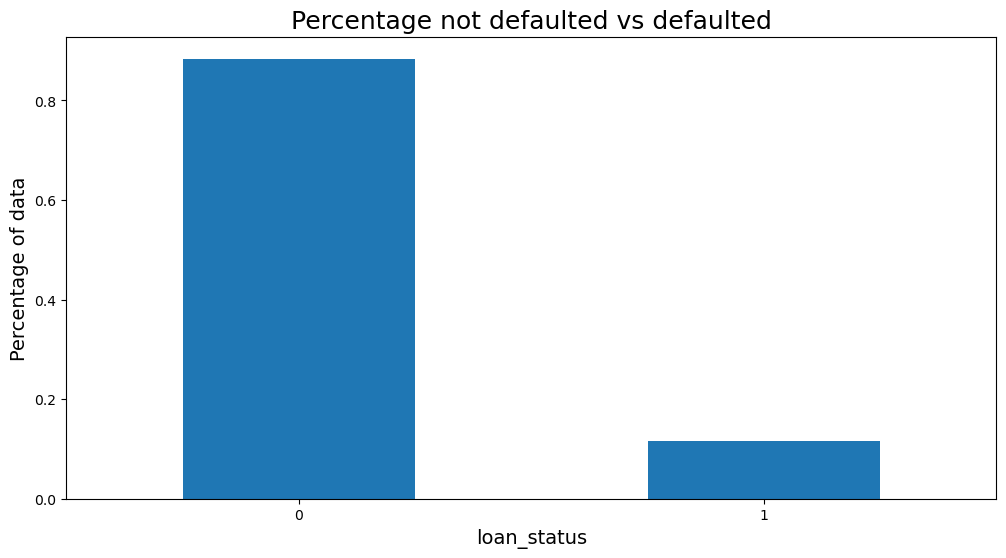

In [19]:
w.defaulted_overall(train)

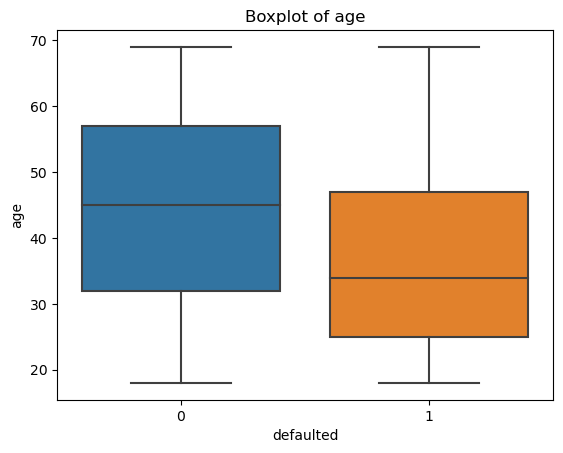

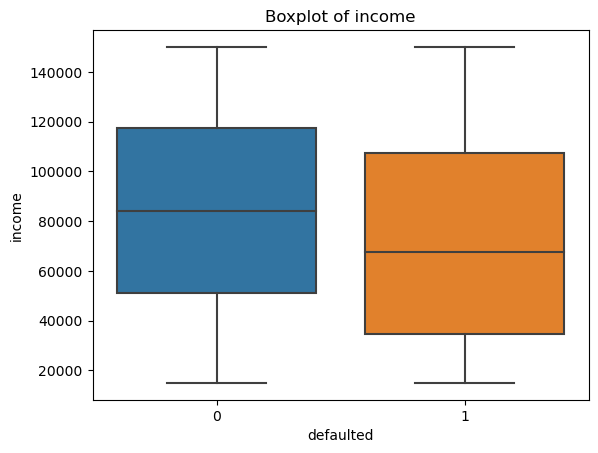

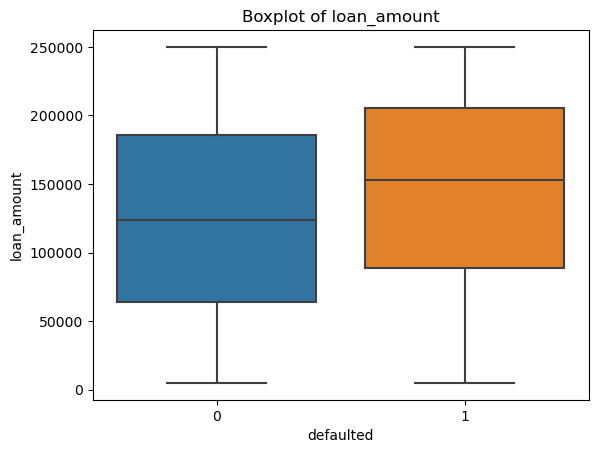

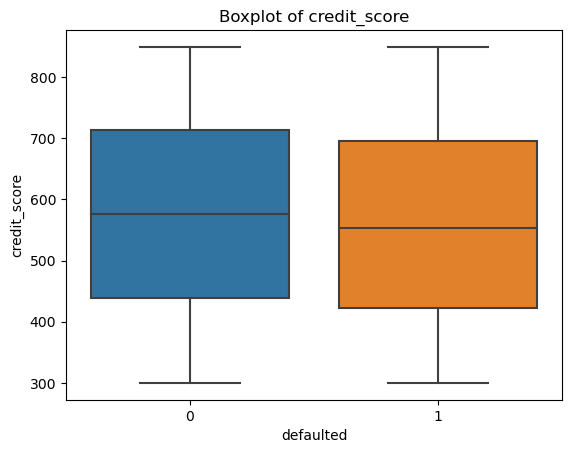

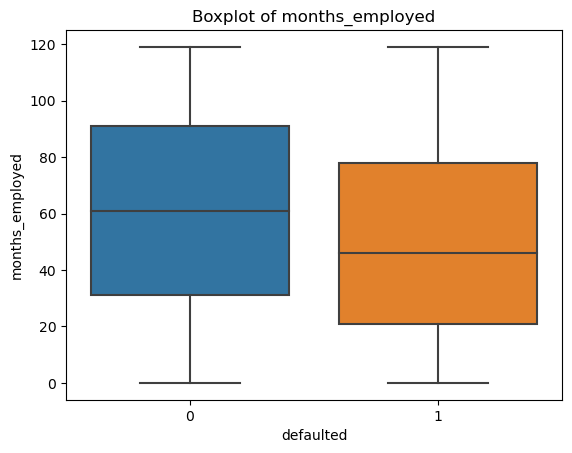

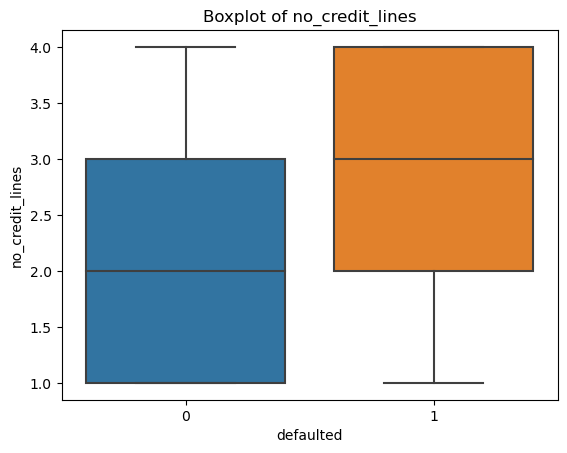

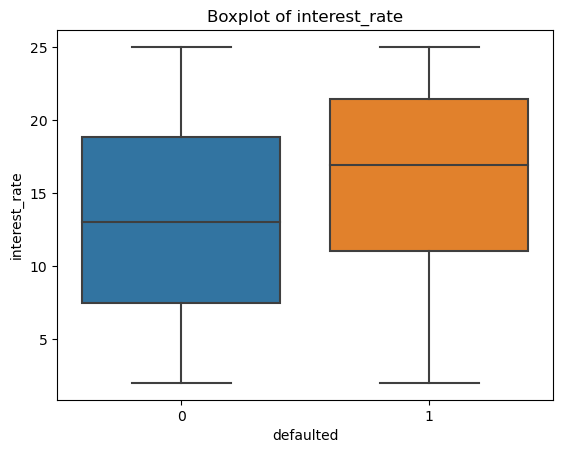

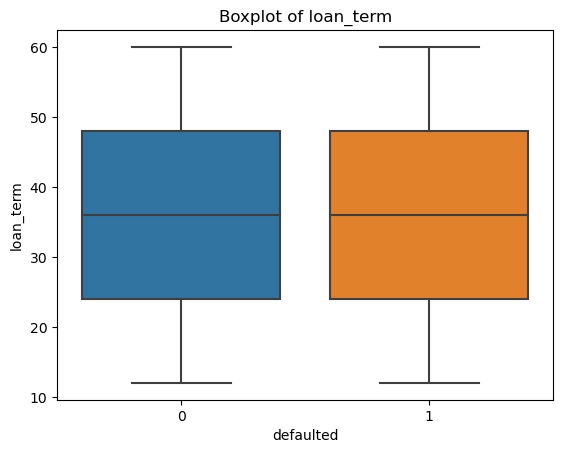

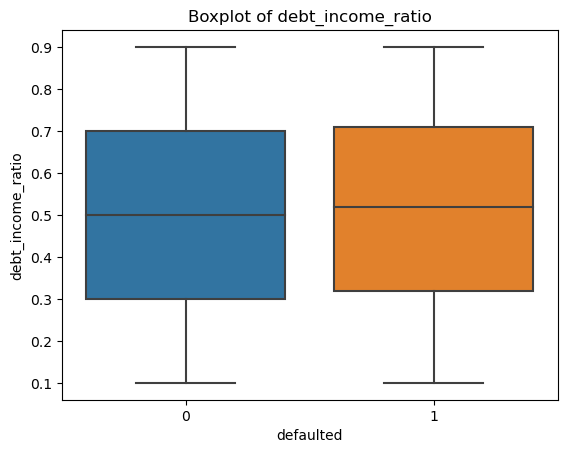

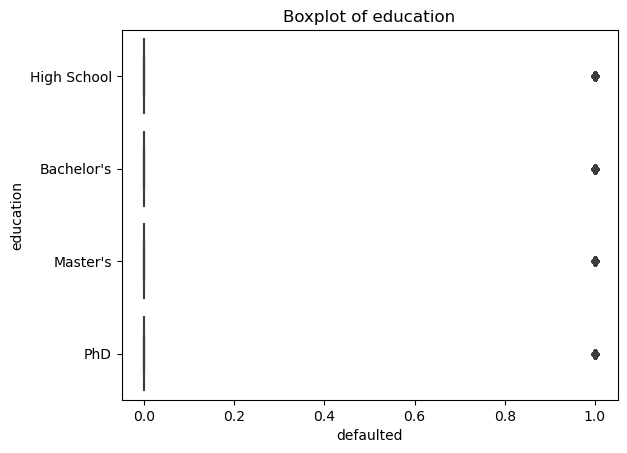

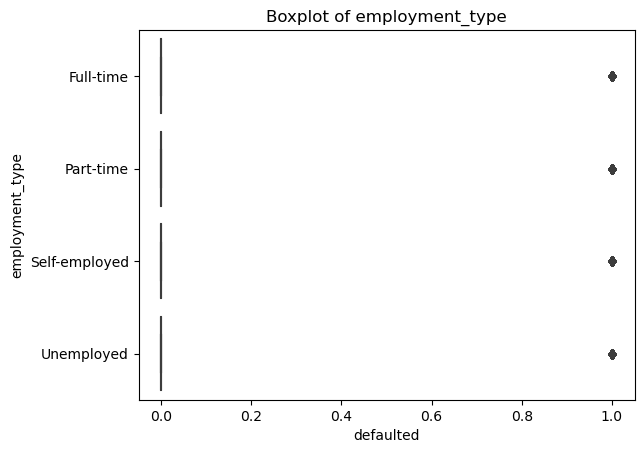

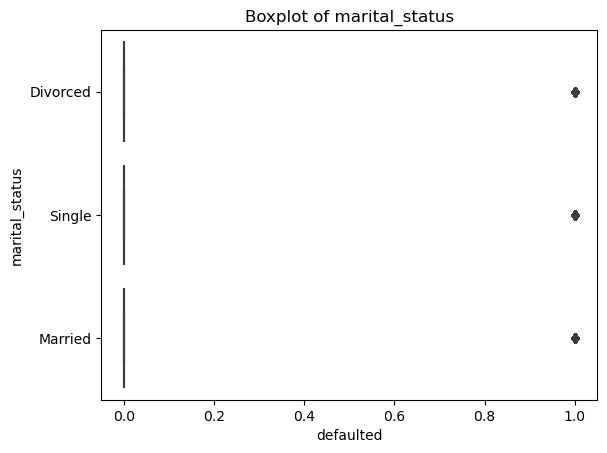

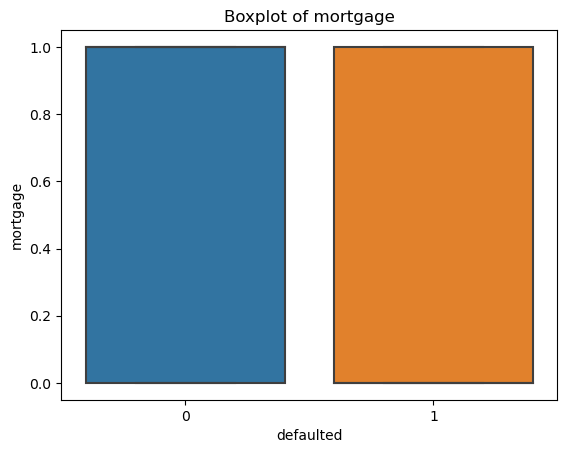

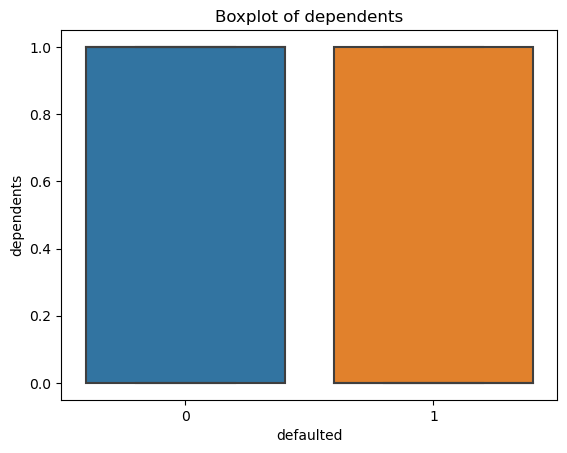

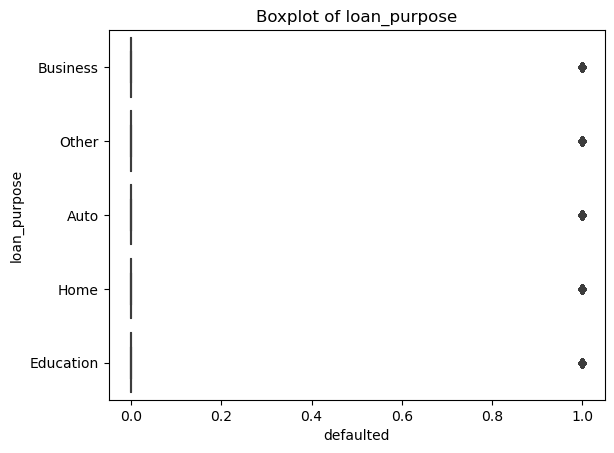

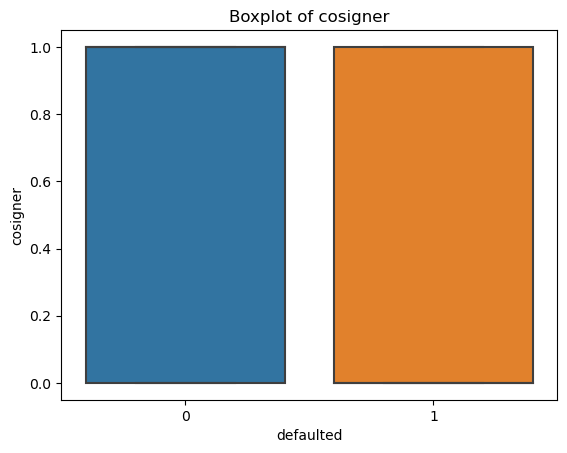

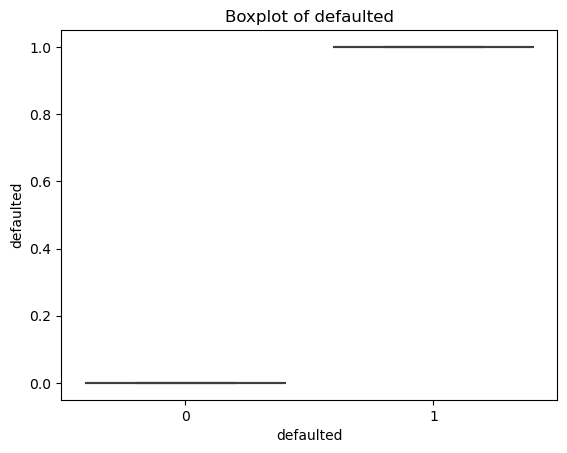

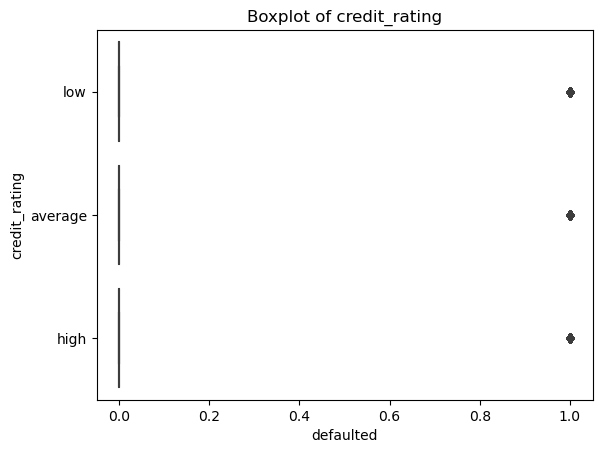

In [20]:
for col in train:
    sns.boxplot(data=train, x='defaulted', y= col)
    plt.title(f'Boxplot of {col}')
    plt.show()

### This shows that there is a fair amount descrepencies in Intrest Rate, Number of Lines of credit, Age, and maybe a few others like loan amount, income, marital Status

In [ ]:
# Created a contingency table for marital status and defaulted
contingency_table = pd.crosstab(df['marital_status'], df['defaulted'])

# Create a bar chart that shows just yes for which marital status had the most defaults
plt.figure(figsize=(10, 6))
sns.countplot(x='marital_status', hue='defaulted', data=df[df['defaulted'] == 1], palette='viridis')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Defaults by Marital Status')
plt.legend(title='Defaulted', labels=['Yes'])
plt.show()


### Check for any scewed data

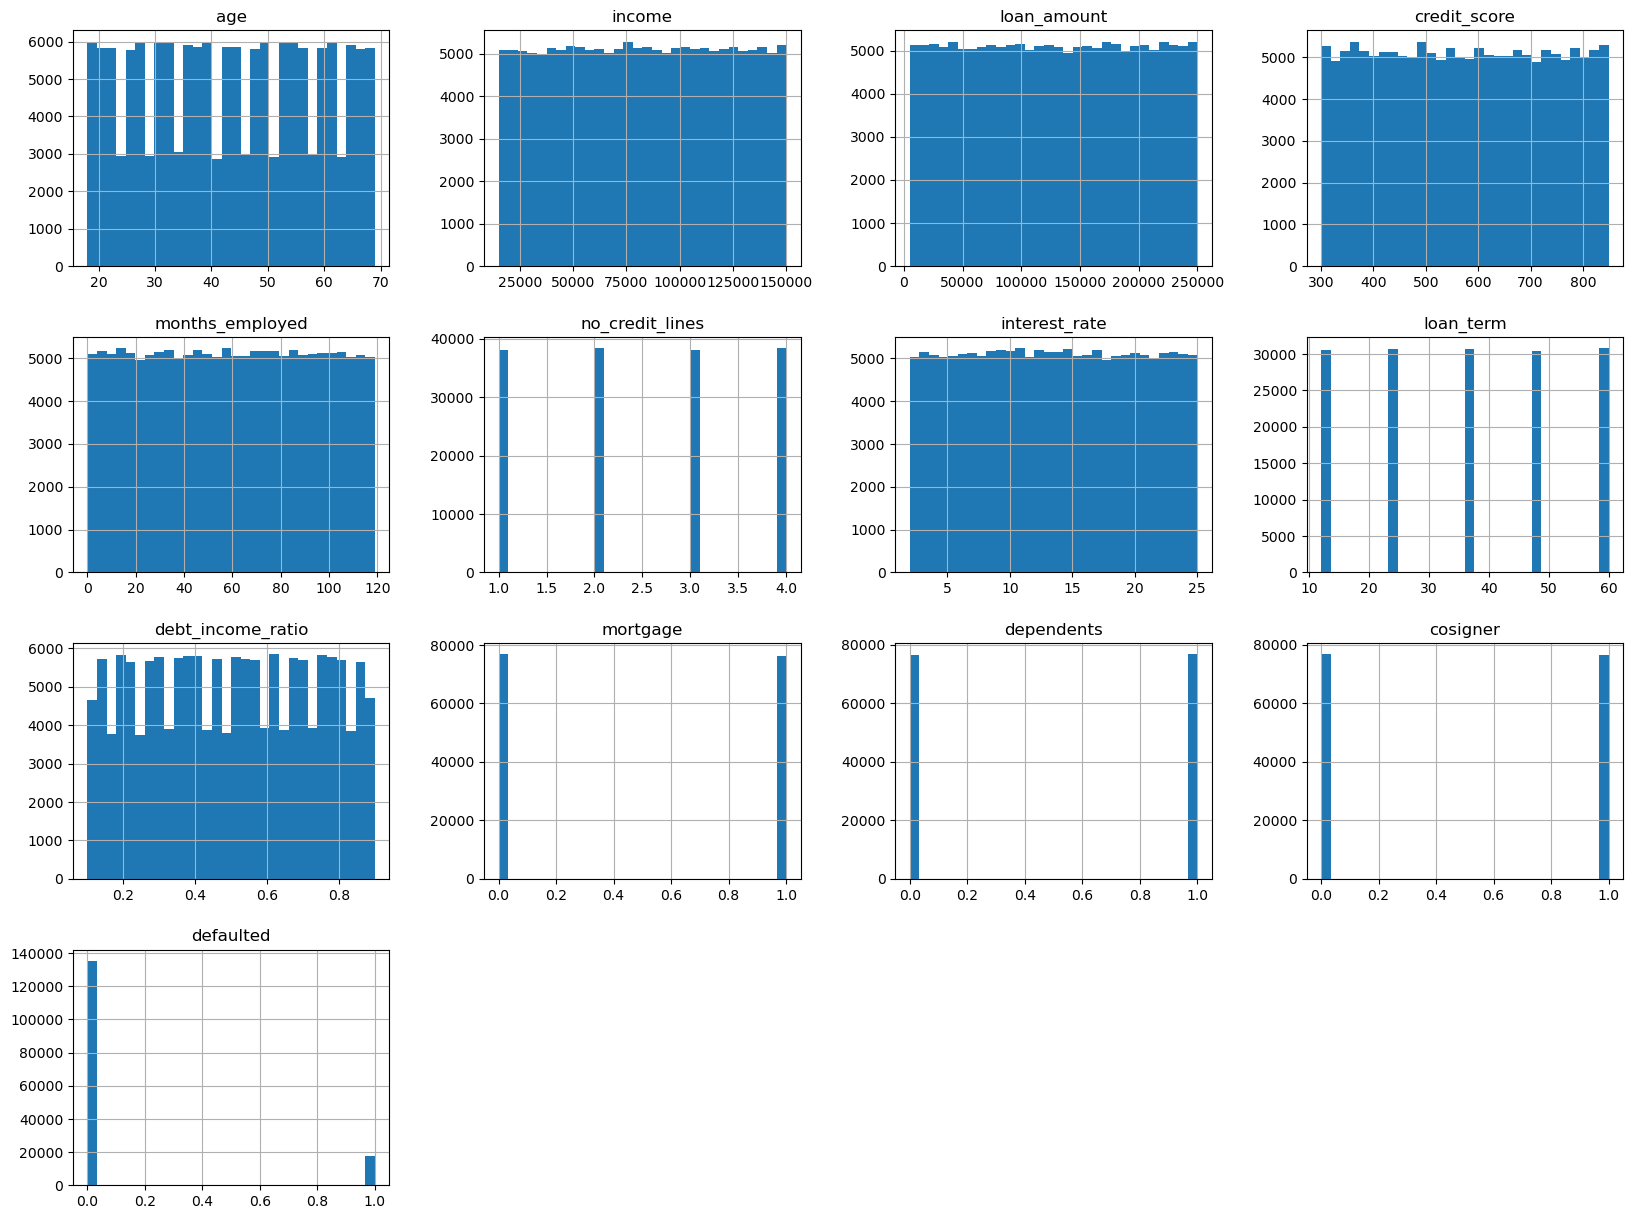

In [23]:
train.hist(bins=30, figsize=(20,15))
plt.show()

## Stats testing we decided between T-Test Independent aka two tailed 

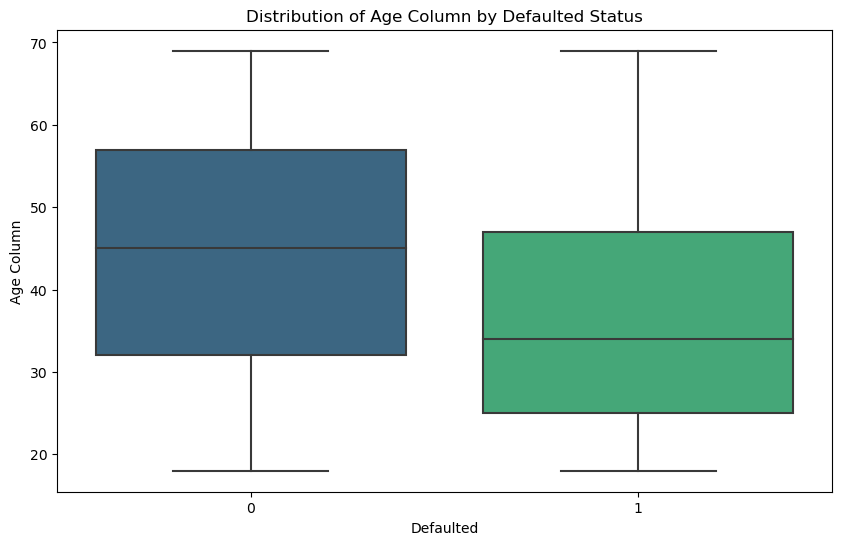

In [42]:
# Visualization for Age 
plt.figure(figsize=(10, 6))
sns.boxplot(x='defaulted', y='age', data=train, palette='viridis')
# Add significance indicator for p-value

plt.xlabel('Defaulted')
plt.ylabel('Age Column')
plt.title('Distribution of Age Column by Defaulted Status')
plt.show()

### $H_o$: There is no association between age and defaulting.

### $H_a$: There is an association between age and defaulting.

### lets run stats test to confirm.

In [38]:
alpha = 0.05

In [39]:
#  with a numerical variable  and binary target default
group_0 = train[train.defaulted == 0].age
group_1 = train[train.defaulted == 1].age

In [40]:
# Perform t-testP
t_statistic, p_value = ttest_ind(group_0, group_1)
print(f't_statistic:',t_statistic)
print(f'p_value:',p_value)

t_statistic: 65.78369214154512
p_value: 0.0


In [41]:
if p_value/2 > alpha:
    print("We fail to reject the null hypothesis.")
elif t_statistic < 0:
    print("We fail to reject null hypothesis.")
else:
    print("We reject the null hypothesis.")

We reject the null hypothesis.


### $H_o$: There is no association between no_of_credit_lines and defaulting.

### $H_a$: There is an association between no_of_credit_lines and defaulting.

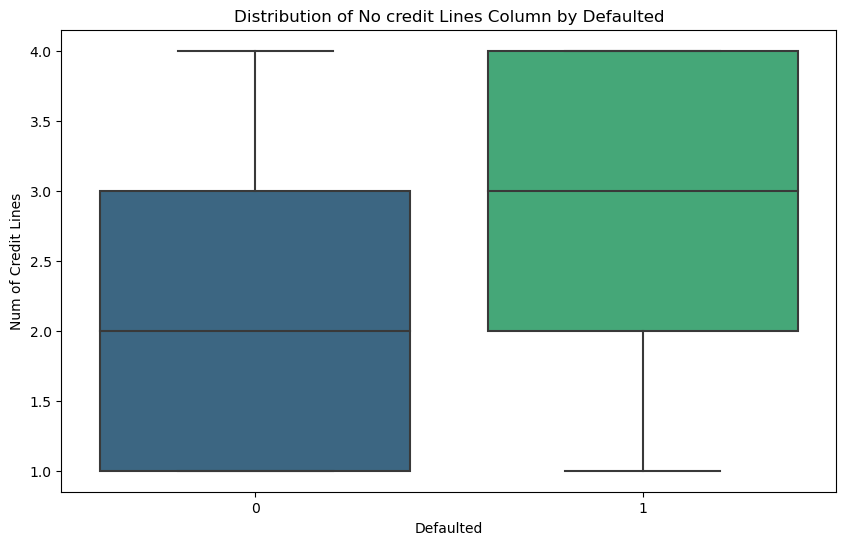

In [43]:
# Visualization for Number of Lines of Credit
plt.figure(figsize=(10, 6))
sns.boxplot(x='defaulted', y='no_credit_lines', data=train, palette='viridis')


plt.xlabel('Defaulted')
plt.ylabel('Num of Credit Lines')
plt.title('Distribution of No credit Lines Column by Defaulted')
plt.show()

In [46]:
# a numerical variable and binary target defaulted
group0 = train[train.defaulted == 0].no_credit_lines
group1 = train[train.defaulted == 1].no_credit_lines

# Perform t-test
t_statistic, p_value = ttest_ind(group0, group1)
print(t_statistic)
print(p_value)

-12.286617706653468
1.1098665374991854e-34


In [47]:
if p_value/2 > alpha:
    print("We fail to reject the null hypothesis.")
elif t_statistic < 0:
    print("We fail to reject null hypothesis.")
else:
    print("We reject the null hypothesis.")

We fail to reject null hypothesis.


### $H_o$: There is no association between intrest_rate and defaulting.

### $H_a$: There is an association between intrest_rate and defaulting.

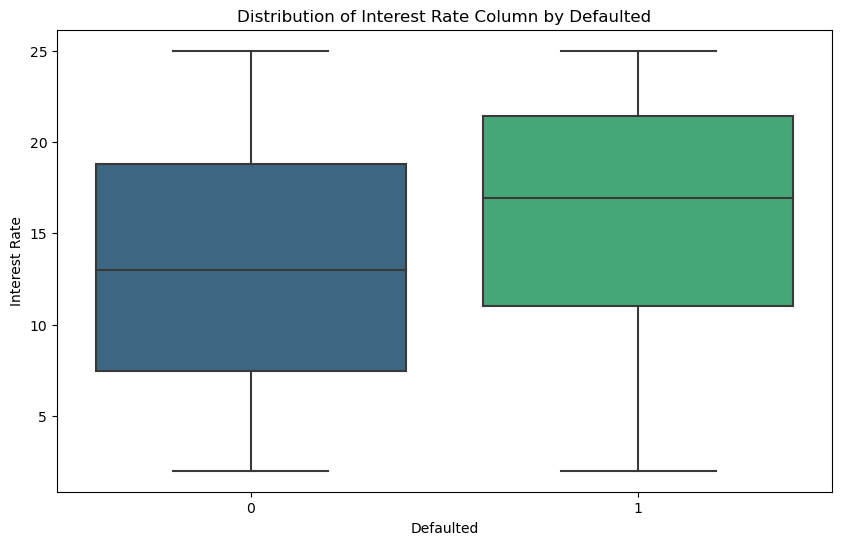

In [51]:
# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='defaulted', y='interest_rate', data=train, palette='viridis')


plt.xlabel('Defaulted')
plt.ylabel('Interest Rate')
plt.title('Distribution of Interest Rate Column by Defaulted')
plt.show()

In [49]:
intrest_rate_0 = train[train.defaulted == 0].interest_rate
intrest_rate_1 = train[train.defaulted == 1].interest_rate

# Perform t-test
t_statistic, p_value = ttest_ind(intrest_rate_0, intrest_rate_1)
print(t_statistic)
print(p_value)

-52.17109940445979
0.0


In [50]:
if p_value/2 > alpha:
    print("We fail to reject the null hypothesis.")
elif t_statistic < 0:
    print("We fail to reject null hypothesis.")
else:
    print("We reject the null hypothesis.")

We fail to reject null hypothesis.


### $H_o$: There is no association between income and defaulting.

### $H_a$: There is an association between income and defaulting.

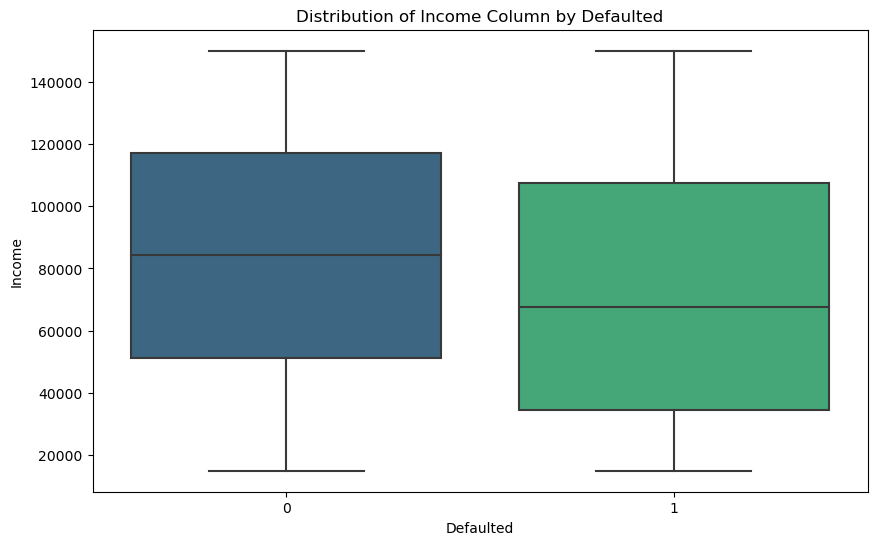

In [52]:
# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='defaulted', y='income', data=train, palette='viridis')


plt.xlabel('Defaulted')
plt.ylabel('Income')
plt.title('Distribution of Income Column by Defaulted')
plt.show()

In [53]:
# Example with a numerical variable and binary target defaulted
income_0 = train[train.defaulted == 0].income
income_1 = train[train.defaulted == 1].income

# Perform t-test
t_statistic, p_value = ttest_ind(income_0, income_1)
print(t_statistic)
print(p_value)

37.68455529485235
2.35268135542907e-309


In [54]:
if p_value/2 > alpha:
    print("We fail to reject the null hypothesis.")
elif t_statistic < 0:
    print("We fail to reject null hypothesis.")
else:
    print("We reject the null hypothesis.")

We reject the null hypothesis.


In [56]:
cosigner_0 = train[train.defaulted == 0].cosigner
cosigner_1 = train[train.defaulted == 1].cosigner

# Perform t-test
t_statistic, p_value = ttest_ind(cosigner_0, cosigner_1)
print(t_statistic)
print(p_value)

16.004138390594175
1.331610074172519e-57


In [57]:
if p_value/2 > alpha:
    print("We fail to reject the null hypothesis.")
elif t_statistic < 0:
    print("We fail to reject null hypothesis.")
else:
    print("We reject the null hypothesis.")

We reject the null hypothesis.


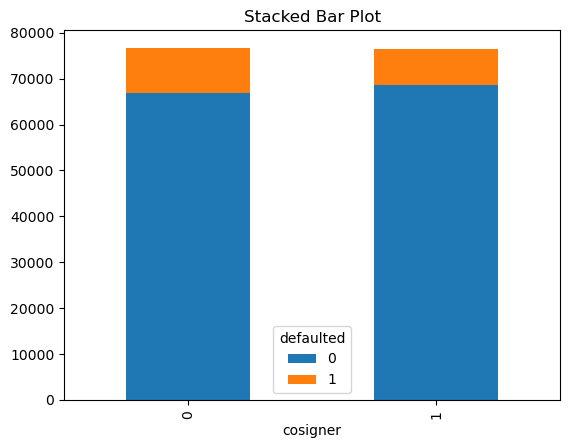

In [59]:
#tried something different than boxplot created a stacked bar plot 
contingency_table = pd.crosstab(train['cosigner'], train['defaulted'])
contingency_table.plot(kind='bar', stacked=True, title='Stacked Bar Plot')
plt.show()

## Now let's Model

### I have decided to go with my best model being XGBoost Regressor

In [62]:
# create X & y version of train, where y is a series with just the target variable and X are all the features not including cat features.From further evaluation they are deemed minimal factors . 

X_train = train.drop(columns=['defaulted','education','employment_type','marital_status','loan_purpose','credit_rating'])
y_train = train.defaulted

X_validate = validate.drop(columns=['defaulted','education','employment_type','marital_status','loan_purpose','credit_rating'])
y_validate = validate.defaulted

X_test = test.drop(columns=['defaulted','education','employment_type','marital_status','loan_purpose','credit_rating'])
y_test = test.defaulted

In [63]:
X_train

,age,income,loan_amount,credit_score,months_employed,no_credit_lines,interest_rate,loan_term,debt_income_ratio,mortgage,dependents,cosigner
loan_id,,,,,,,,,,,,
2FEE66HVO3,57,32880,38552,474,108,2,8.60,24,0.62,0,1,1
FXEAZ6F4KJ,20,57608,228885,522,2,4,13.86,12,0.65,1,0,0
KMM2TU8JGI,18,137506,216972,584,93,4,3.69,12,0.67,1,0,1
YMBWR05BG6,20,66320,34880,423,38,4,19.02,60,0.27,0,0,1
H2J918A441,31,39220,152376,391,105,3,5.04,60,0.75,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2S807PV9RL,55,57658,23121,385,21,1,24.09,60,0.71,1,1,0
HJQJSJXTFV,18,70228,126058,431,95,4,6.42,60,0.80,1,0,1
0BT6XL67MC,67,112537,78814,373,21,2,23.78,36,0.49,0,0,1


### No need to scale the data when using XGBoost

In [64]:
# Convert the dataset into an optimized data structure called DMatrix that XGBoost supports
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Specify the parameters
params = {
    'objective':'binary:logistic',
    'max_depth': 4,
    'alpha': 10,
    'learning_rate': 1.0,
    'n_estimators':100
}

# Train the model
model = xgb.train(params, dtrain)

# Make predictions
preds = model.predict(dtest)

# This portion of XGBoost gives feature importance
- This feature importance shows me what features cause loan defualt with Age, income, loan amount, and intrest Rate being the main drivers for Defaulting loans

In [65]:
# Get feature importance
importance = model.get_score(importance_type='weight')

# Print feature importance
for feature, score in importance.items():
    print(f'Feature: {feature}, Score: {score}')

Feature: age, Score: 17.0
Feature: income, Score: 23.0
Feature: loan_amount, Score: 25.0
Feature: credit_score, Score: 11.0
Feature: months_employed, Score: 15.0
Feature: no_credit_lines, Score: 3.0
Feature: interest_rate, Score: 31.0
Feature: debt_income_ratio, Score: 9.0
Feature: mortgage, Score: 3.0
Feature: dependents, Score: 4.0
Feature: cosigner, Score: 6.0


# Now lets get to XGBoost Regressor 

### The num_round parameter in XGBoost stands for the number of boosting rounds. This refers to the number of times the boosting process (where the model learns from its mistakes in the previous round) is run during model training

In [67]:
# Convert the dataset to DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for the xgboost
param = {'max_depth': 4, 'eta': 0.3, 'objective': 'reg:squarederror'}

# Train the model 
num_round = 20
bst = xgb.train(param, dtrain, num_round)


### Now lets create the basline using RMSE

In [68]:
# Make prediction
preds = bst.predict(dtest)

# Print the predictions
print("Predictions:", preds)

# Calculate the baseline prediction: mean of target variable it is its own way scaling
baseline_preds = np.full(y_test.shape, np.mean(y_train))

# Calculate RMSE for the baseline predictions
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_preds))
print("Baseline RMSE:", baseline_rmse)

Predictions: [0.02392063 0.20396562 0.01361351 ... 0.02057705 0.14708586 0.0679303 ]
Baseline RMSE: 0.3203863990024923


# Lets take this info here and put it into a Data frame and print a vizual for this Model

In [69]:
# Create a dataframe with actual and predicted values
xgb_reg_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': preds,
    'Baseline_RMSE': baseline_rmse
})

xgb_reg_df


,Actual,Predicted,Baseline_RMSE
loan_id,,,
57E79Q4XUD,0,0.023921,0.320386
HORLIV3CDB,0,0.203966,0.320386
QRMBNKXQKY,0,0.013614,0.320386
K19PHXETPR,0,0.043504,0.320386
7CO1OLJP79,0,0.102896,0.320386
...,...,...,...
SONGV0L6MV,0,0.034328,0.320386
HO7ZNL86DX,1,0.034958,0.320386
OZHOJDKR5D,0,0.020577,0.320386


## So the Average for each one of Baseline RMSE and Predicted

- Baseline RMSE Average is 0.3203863990024923
- While Predicted Regressor is 0.116539255

### So the model performs better than baseline. 

### Here is a vizualization using Graphviz

<Axes: >

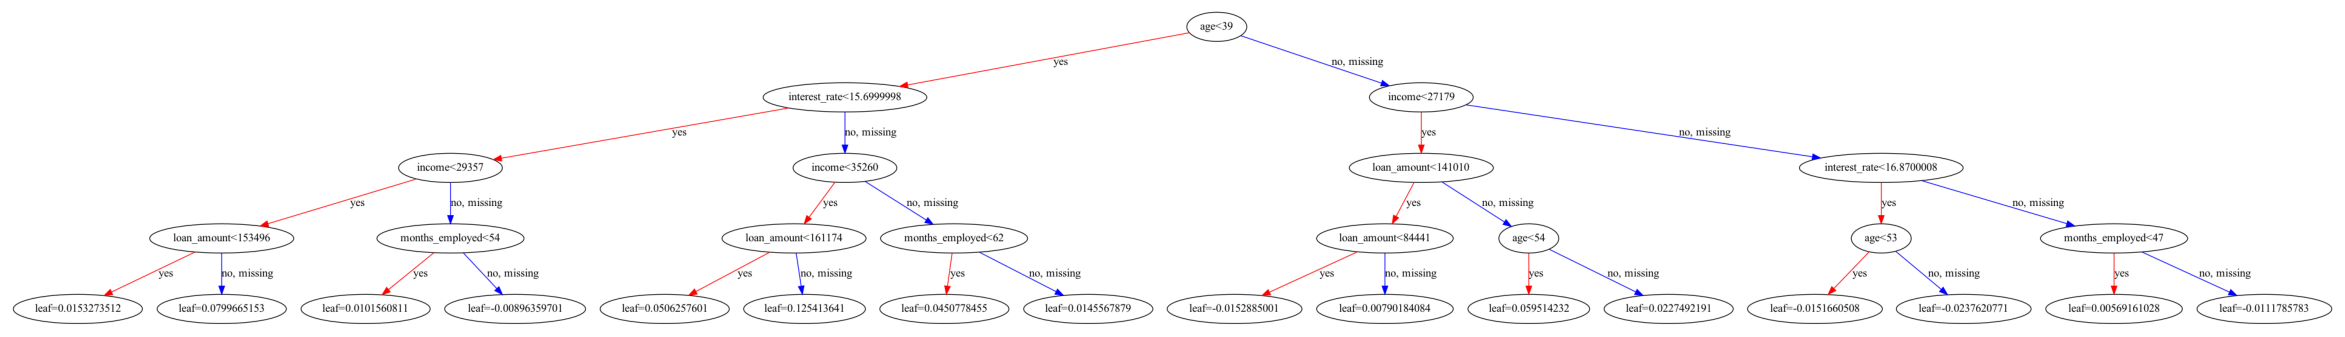

In [71]:
#  'bst' is your test model
fig, ax = plt.subplots(figsize=(30, 30))
xgb.plot_tree(bst, num_trees=0, ax=ax)

## Conclusion:
- After running the models, XGBoost regressor ran the best. Did not scale the data. Our RMSE basline was 0.3203863990024923. Our model had a 0.116539255 which performed better than basline.


## Recommendations:
- I would like to do some more indepth analysis on my catagorial features and see if they had an impact as well. I think Loan Amount and Interest Rates are the big drivers with some other features right behind. 